In [1]:
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv("smallset.csv")

In [3]:
df.tail()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
724,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,831777004.0,0.011847,...,Blouse,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1010.0,Blouses,Top in a softly draping weave with a V-neck fr...
725,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,834383002.0,0.042356,...,Dress,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1013.0,Dresses Ladies,"Short, sleeveless dress in sturdy satin with a..."
726,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,714026020.0,0.025407,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...
727,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,714026020.0,0.025407,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...
728,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,892337003.0,0.101678,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in superstretch fabric made from...


In [4]:
df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,564334002.0,0.025407,...,Expressive Lingerie,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Balconette lace bra with underwired, moulded, ..."
1,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,613246004.0,0.042356,...,Trouser,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1009.0,Trousers,5-pocket jeans in washed superstretch denim wi...
2,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,501820025.0,0.016932,...,Tops Knitwear,D,Divided,2.0,Divided,53.0,Divided Collection,1003.0,Knitwear,Jumper in a soft knit with a slightly wider ne...
3,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,521302001.0,0.038966,...,Knitwear,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1003.0,Knitwear,Wide jumper in a soft rib knit containing some...
4,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,448509009.0,0.020322,...,Trousers,D,Divided,2.0,Divided,53.0,Divided Collection,1009.0,Trousers,"5-pocket, ankle-length jeans in washed, sturdy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,831777004.0,0.011847,...,Blouse,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1010.0,Blouses,Top in a softly draping weave with a V-neck fr...
725,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,834383002.0,0.042356,...,Dress,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1013.0,Dresses Ladies,"Short, sleeveless dress in sturdy satin with a..."
726,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,714026020.0,0.025407,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...
727,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,714026020.0,0.025407,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...


In [5]:
df1 = df.pop("article_id")
df["article_id"] = df1

In [6]:
test1 = df.loc[df['customer_id'].isin(['00c160fd797be9c52491373b16ec194d4edb129c57266e85e65bb9814a25490d'])]

In [7]:
test1

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,price,sales_channel_id,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,article_id
0,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.025407,2.0,...,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Balconette lace bra with underwired, moulded, ...",564334002.0
1,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.042356,2.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1009.0,Trousers,5-pocket jeans in washed superstretch denim wi...,613246004.0
2,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.016932,2.0,...,D,Divided,2.0,Divided,53.0,Divided Collection,1003.0,Knitwear,Jumper in a soft knit with a slightly wider ne...,501820025.0
3,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.038966,2.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1003.0,Knitwear,Wide jumper in a soft rib knit containing some...,521302001.0
4,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.020322,2.0,...,D,Divided,2.0,Divided,53.0,Divided Collection,1009.0,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",448509009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-12,0.059305,2.0,...,A,Ladieswear,1.0,Ladieswear,6.0,Womens Casual,1003.0,Knitwear,"Straight-style, calf-length dress in a soft kn...",828912004.0
488,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-12,0.059305,2.0,...,C,Ladies Accessories,1.0,Ladieswear,64.0,Womens Shoes,1020.0,Shoes,Chelsea boots with elastic gores in the sides ...,909320002.0
489,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-20,0.033881,2.0,...,D,Divided,2.0,Divided,51.0,Divided Basics,1002.0,Jersey Basic,Joggers in sweatshirt fabric with a high elast...,759814009.0
490,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-20,0.050831,2.0,...,D,Divided,2.0,Divided,53.0,Divided Collection,1007.0,Outdoor,Puffer jacket in nylon with a zip down the fro...,870999004.0


In [8]:
test = df.loc[df['t_dat'].isin(['2020-09-04', '2020-09-08', '2020-09-09', '2020-09-12', '2020-09-20'])]

In [9]:
test

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,price,sales_channel_id,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,article_id
477,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-04,0.118627,2.0,...,A,Ladieswear,1.0,Ladieswear,19.0,Womens Jackets,1007.0,Outdoor,Calf-length coat in woven fabric with notch la...,909014001.0
478,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-08,0.033881,1.0,...,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Wide top in sweatshirt fabric with a lined dra...,456163060.0
479,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-08,0.033881,1.0,...,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Wide top in sweatshirt fabric with a lined dra...,456163087.0
480,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-08,0.016932,1.0,...,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear",Thong briefs in microfibre with a low waist an...,821398002.0
481,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-08,0.033881,1.0,...,A,Ladieswear,1.0,Ladieswear,16.0,Womens Everyday Basics,1002.0,Jersey Basic,Wide top in sweatshirt fabric with a lined dra...,456163085.0
482,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-08,0.016932,1.0,...,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear",Thong briefs in soft jersey made from a cotton...,821395005.0
483,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-08,0.033881,1.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1003.0,Knitwear,"Boxy-style jumper in a soft, fine knit contain...",911870001.0
484,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-09,0.050831,2.0,...,C,Ladies Accessories,1.0,Ladieswear,64.0,Womens Shoes,1020.0,Shoes,Ankle boots in imitation leather with covered ...,901330002.0
485,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-12,0.016932,2.0,...,D,Divided,2.0,Divided,53.0,Divided Collection,1003.0,Knitwear,"Jumper in a soft knit with a ribbed polo neck,...",761406001.0
486,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2020-09-12,0.059305,2.0,...,A,Ladieswear,1.0,Ladieswear,6.0,Womens Casual,1003.0,Knitwear,Long cardigan in a soft knit containing some w...,874819003.0


In [10]:
train = df.loc[~df['t_dat'].isin(['2020-09-04', '2020-09-08', '2020-09-09', '2020-09-12', '2020-09-20'] )]

In [11]:
train

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,price,sales_channel_id,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,article_id
0,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.025407,2.0,...,B,Lingeries/Tights,1.0,Ladieswear,61.0,Womens Lingerie,1017.0,"Under-, Nightwear","Balconette lace bra with underwired, moulded, ...",564334002.0
1,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.042356,2.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1009.0,Trousers,5-pocket jeans in washed superstretch denim wi...,613246004.0
2,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.016932,2.0,...,D,Divided,2.0,Divided,53.0,Divided Collection,1003.0,Knitwear,Jumper in a soft knit with a slightly wider ne...,501820025.0
3,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.038966,2.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1003.0,Knitwear,Wide jumper in a soft rib knit containing some...,521302001.0
4,00c160fd797be9c52491373b16ec194d4edb129c57266e...,1.0,1.0,ACTIVE,Regularly,24.0,ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...,2018-09-26,0.020322,2.0,...,D,Divided,2.0,Divided,53.0,Divided Collection,1009.0,Trousers,"5-pocket, ankle-length jeans in washed, sturdy...",448509009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,0.011847,2.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1010.0,Blouses,Top in a softly draping weave with a V-neck fr...,831777004.0
725,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,0.042356,2.0,...,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1013.0,Dresses Ladies,"Short, sleeveless dress in sturdy satin with a...",834383002.0
726,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,0.025407,2.0,...,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...,714026020.0
727,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,0.025407,2.0,...,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...,714026020.0


In [12]:
postals_set = set()
for ids in df["postal_code"]:
    postals_set.add(ids)
club_set = set()
for ids in df["club_member_status"]:
    club_set.add(ids)
frequency_set = set()
for ids in df["fashion_news_frequency"]:
    frequency_set.add(ids)
index_name_set = set()
for ids in df["index_name"]:
    index_name_set.add(ids)
index_group_name_set = set()
for ids in df["index_group_name"]:
    index_group_name_set.add(ids)
section_name_set = set()
for ids in df["section_name"]:
    section_name_set.add(ids)
garment_group_name = set()
for ids in df["garment_group_name"]:
    garment_group_name.add(ids)

In [13]:
df.pop("detail_desc")
df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 't_dat', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'article_id'],
      dtype='object')

In [14]:
le = preprocessing.LabelEncoder()
le.fit(df["customer_id"])
le.transform(df["customer_id"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals

In [16]:
processdf

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,price,sales_channel_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,article_id
0,0,1,1,0,1,1,3,0,65,1,...,21,1,3,0,1,21,22,12,17,66
1,0,1,1,0,1,1,3,0,99,1,...,71,0,2,0,1,3,20,6,15,94
2,0,1,1,0,1,1,3,0,42,1,...,68,3,0,1,0,16,6,2,6,34
3,0,1,1,0,1,1,3,0,93,1,...,33,0,2,0,1,3,20,2,6,41
4,0,1,1,0,1,1,3,0,46,1,...,73,3,0,1,0,16,6,6,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,3,0,0,0,0,2,2,95,25,1,...,7,0,2,0,1,3,20,7,1,442
725,3,0,0,0,0,2,2,95,99,1,...,16,0,2,0,1,3,20,10,3,448
726,3,0,0,0,0,2,2,95,65,1,...,72,4,4,2,2,9,13,6,15,246
727,3,0,0,0,0,2,2,95,65,1,...,72,4,4,2,2,9,13,6,15,246


In [17]:
acc = []
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.65183727  0.58673869  0.67898785 ...  0.24487256 -0.21510723
  -1.45523387]
 [-0.65183727  0.58673869  0.67898785 ...  0.48918647  2.0844687
   0.17167406]
 [-0.65183727  0.58673869  0.67898785 ...  1.22212822  1.03920691
   0.89474425]
 ...
 [-0.65183727  0.58673869  0.67898785 ...  0.1227156   1.24825927
  -1.63600142]
 [-0.65183727  0.58673869  0.67898785 ...  1.22212822  1.03920691
   0.89474425]
 [ 0.91448232  0.58673869 -1.47278041 ... -0.36591223 -1.26036901
  -0.55139613]]
[[-0.65183727  0.58673869  0.67898785 ...  1.22212822  1.03920691
   0.89474425]
 [-0.65183727  0.58673869  0.67898785 ... -1.34316788 -1.46942137
  -0.91293123]
 [-0.65183727  0.58673869  0.67898785 ...  0.48918647  1.87541634
   0.7139767 ]
 ...
 [-0.65183727  0.58673869  0.67898785 ... -1.22101093 -1.26036901
  -0.55139613]
 [-0.65183727  0.58673869  0.67898785 ...  0.36702952 -1.46942137
  -0.91293123]
 [-0.65183727  0.58673869  0.67898785 ...  1.22212822  1.03920691
   0.89474425]]
[495 485 445 457 

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[ 59 335 146 349 190 118 298 298 110 253  22 177 241 184 525 437 444  43
 112 183 174   7 261 241  31 280 226  11   0 124 102 245 157 375  92 364
  39  33 241 241 349 135 116   4 147   0 241  15 370 441  86 481  92 403
 106 102 292 365 437  17  87 321  66 129 157  96  43  56  39  21 441  17
 530]
[ 59 493 161 349 292 240 423 235 327 253  70 223 237 184 534 268 490 319
 112 410 174  89 507 237  51 514 225 275  91 117  97 419 342 387 111 496
 324  80 512 512 478 295 137 281 164 132 511 311  67 400 195 397 151 282
 378  58 408 365 268  19 191 426  93 129 450  71 319  95 345  46 483 238
 414]


In [19]:
print("SciKitLearn")
print("KNN")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
KNN
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.1095890410958904 0.8904109589041096


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         0
          58       0.00      0.00      0.00         1
          59       1.00    

c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [21]:
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)
print("SciKitLearn")
print("KNN")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

[190 255  35 349 190 129 129 146 355 349   0 129 146  76 255 349 190 349
  14 355 190   0 253 146   0 255  76 256  35 349 190 508 349 349 349 255
 190  14 207 207 349 129  35 129 129  35 508  14   0 112 190 508  35 255
 183 190 190 349 349 349 190 349 190 256 349 109 349  76 190 190  14 355
 173]
[ 59 493 161 349 292 240 423 235 327 253  70 223 237 184 534 268 490 319
 112 410 174  89 507 237  51 514 225 275  91 117  97 419 342 387 111 496
 324  80 512 512 478 295 137 281 164 132 511 311  67 400 195 397 151 282
 378  58 408 365 268  19 191 426  93 129 450  71 319  95 345  46 483 238
 414]
SciKitLearn
KNN
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0136986301369863 0.9863013698630136


In [22]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

In [24]:
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.3150684931506849 0.6849315068493151


In [25]:
clf_svm = svm.SVC(kernel='poly', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.1095890410958904 0.8904109589041096


In [26]:
clf_svm = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.1095890410958904 0.8904109589041096


In [27]:
from sklearn import tree

In [28]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SciKitLearn")
print("Trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Trees
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy, Error
0.3561643835616438 0.6438356164383562


In [29]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          16       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         0
          46       1.00      1.00      1.00         1
          51       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         0
          58       1.00      1.00      1.00         1
          59       1.00      1.00      1.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         0
          70       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         0
          89       0.00    

c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [31]:
print("SciKitLearn")
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Naive Bayes
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.3424657534246575 0.6575342465753424


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          16       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         0
          46       1.00      1.00      1.00         1
          51       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         0
          58       1.00      1.00      1.00         1
          59       1.00      1.00      1.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         0
          70       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         0
          89       0.00    

c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 1000")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 1000
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.3424657534246575 0.6575342465753424


In [35]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [36]:
print("SciKitLearn")
print("Random Forest 100")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 100
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy, Error
0.3561643835616438 0.6438356164383562


In [37]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 1000")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 1000
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy, Error
0.3561643835616438 0.6438356164383562


In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("SciKitLearn")
print("Logistic regression")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Logistic regression
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.2876712328767123 0.7123287671232876


c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Adaboost with decision trees
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Accuracy, Error
0.0 1.0


In [41]:
gradient_booster = GradientBoostingClassifier(learning_rate=1)
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Adaboost with decision trees
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy, Error
0.3561643835616438 0.6438356164383562


In [42]:
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (0.11.2)

Requirement already satisfied: numpy>=1.15 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (1.22.2)

Requirement already satisfied: pandas>=0.23 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (1.4.1)

Requirement already satisfied: scipy>=1.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (1.8.0)

Requirement already satisfied: matplotlib>=2.2 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (3.5.1)

Requirement already satisfied: pyparsing>=2.2.1 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (3.0.7)

Requirement already satisfied: cycler>=0.10 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (4.29.1)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (1.3.2)

Requirement already satisfied: pillow>=6.2.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (9.0.1)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: packaging>=20.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (21.3)

Requirement already satisfied: pytz>=2020.1 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from pandas>=0.23->seaborn) (2021.3)

Requirement already satisfied: six>=1.5 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

WARNING: You are using pip version 22.0.3; however, version 22.0.4 is available.
You should consider upgrading via the 'c:\users\derrick\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:>

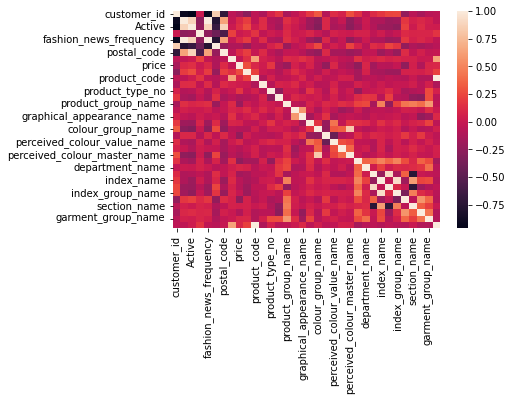

In [43]:
sns.heatmap(processdf.corr())

C:\Users\Derrick\AppData\Local\Temp\ipykernel_4448\2819867210.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

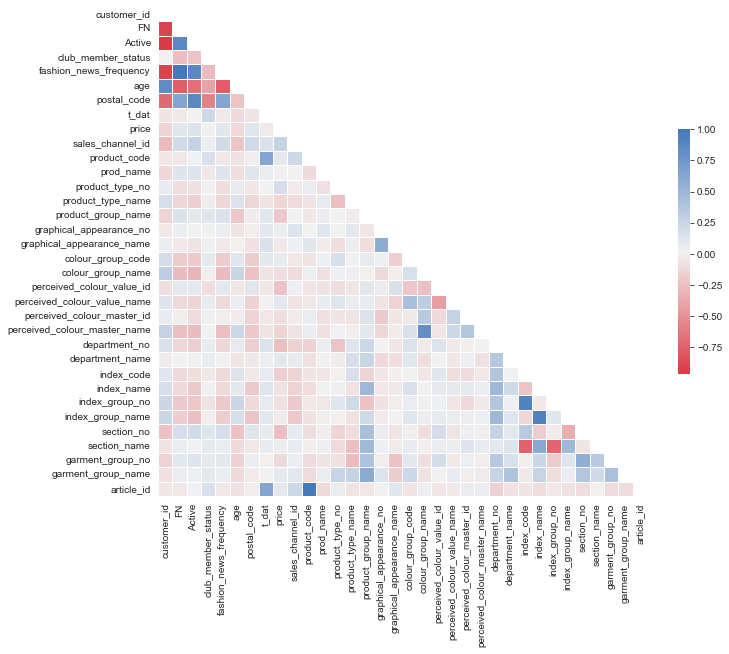

In [44]:
corr = processdf.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Text(0.5, 1.0, 'Correlation')

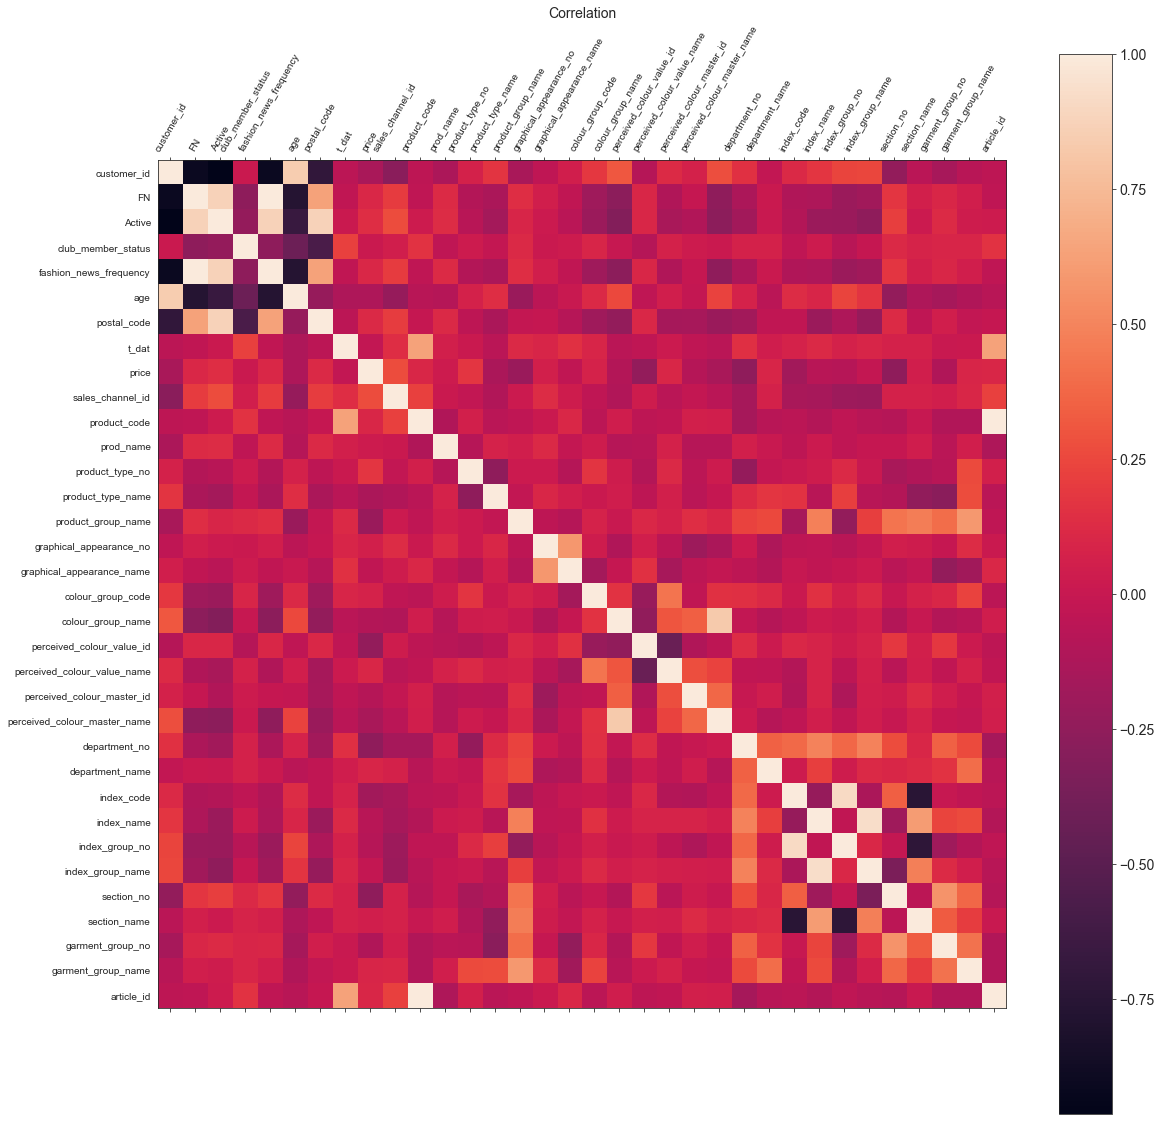

In [45]:
corr = processdf.corr()
fig = plt.figure(figsize=(19,19))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10,rotation=60)
plt.yticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation', fontsize=14)

In [46]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [48]:
np.set_printoptions(precision=3)
print(processdf.columns)
print(fit.scores_)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 't_dat', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'article_id'],
      dtype='object')
[ 1381.635   188.174   231.073   680.625   188.174   127.51    139.63
 13576.51  11510.689    66.713 57262.431 55856.347  3703.803  5819.798
  1142.975  1495.159  1951.306  6213.457  9803.163   517.65    779.255
  1577.681  4320.091 12345.155  9798.192   962.7     793.

In [50]:
svc=svm.SVC(probability=True, kernel='linear')
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,
                         learning_rate=1)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

SciKitLearn
Adaboost with decision trees
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0 1.0


In [51]:
svc=svm.SVC(probability=True, kernel='poly')
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,
                         learning_rate=1)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)


SciKitLearn
Adaboost with decision trees
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0 1.0


In [63]:
acc

[0.1095890410958904,
 0.0136986301369863,
 0.3150684931506849,
 0.1095890410958904,
 0.1095890410958904,
 0.3561643835616438,
 0.3424657534246575,
 0.3424657534246575,
 0.3561643835616438,
 0.3561643835616438,
 0.2876712328767123,
 0.0,
 0.3561643835616438,
 0.0,
 0.0]

In [71]:
labs = ['KNN5', "KNN100", "SVML", "SVMP", "SVMRGF", "DT","NB","RF10", "RF100", "RF1000", "LR", "Adaboost", "GB","AdaSVML","AdaSVMP"]
len(labs)

15

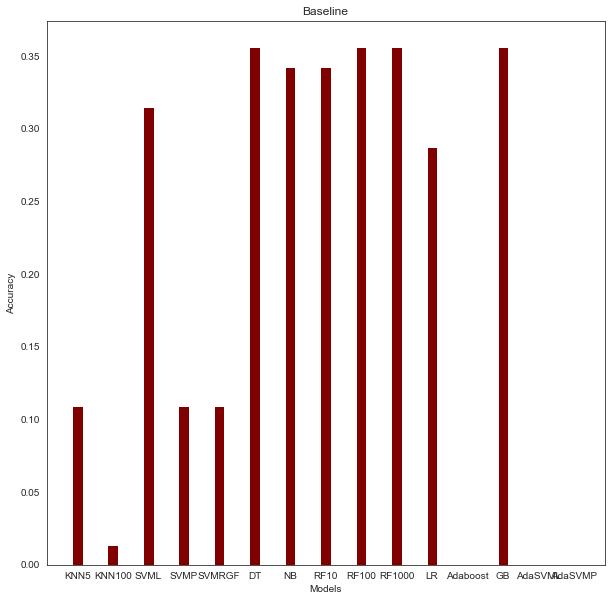

In [72]:
fig = plt.figure(figsize= (10, 10))
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Baseline")
plt.show()